In [1]:
using SymPy

In [2]:
@vars α β

(α, β)

In [3]:
T = Sym[α 1-β;1-α β]
T

2×2 Matrix{Sym}:
     α  1 - β
 1 - α      β

In [4]:
typeof(T)

Matrix{Sym} (alias for Array{Sym, 2})

In [5]:
PY = T*ones(Int,2)/2 
PY

2-element Vector{Sym}:
  α/2 - β/2 + 1/2
 -α/2 + β/2 + 1/2

In [6]:
I(p) = -p*log2(p)

I (generic function with 1 method)

In [7]:
HY = sum(I,PY)
HY

⎛  α   β   1⎞    ⎛α   β   1⎞   ⎛α   β   1⎞    ⎛  α   β   1⎞
⎜- ─ + ─ - ─⎟⋅log⎜─ - ─ + ─⎟   ⎜─ - ─ - ─⎟⋅log⎜- ─ + ─ + ─⎟
⎝  2   2   2⎠    ⎝2   2   2⎠   ⎝2   2   2⎠    ⎝  2   2   2⎠
──────────────────────────── + ────────────────────────────
           log(2)                         log(2)           

In [8]:
PXY = T/2
PXY

2×2 Matrix{Sym}:
       α/2  1/2 - β/2
 1/2 - α/2        β/2

In [9]:
HXY = sum(I,PXY)

       ⎛α⎞        ⎛β⎞   ⎛α   1⎞    ⎛1   α⎞   ⎛β   1⎞    ⎛1   β⎞
  α⋅log⎜─⎟   β⋅log⎜─⎟   ⎜─ - ─⎟⋅log⎜─ - ─⎟   ⎜─ - ─⎟⋅log⎜─ - ─⎟
       ⎝2⎠        ⎝2⎠   ⎝2   2⎠    ⎝2   2⎠   ⎝2   2⎠    ⎝2   2⎠
- ──────── - ──────── + ────────────────── + ──────────────────
  2⋅log(2)   2⋅log(2)         log(2)               log(2)      

In [10]:
IXY = simplify(1 + HY - HXY)
IXY

     ⎛α⎞        ⎛β⎞              ⎛1   α⎞              ⎛1   β⎞                 
α⋅log⎜─⎟ + β⋅log⎜─⎟ - (α - 1)⋅log⎜─ - ─⎟ - (β - 1)⋅log⎜─ - ─⎟ - (-α + β + 1)⋅l
     ⎝2⎠        ⎝2⎠              ⎝2   2⎠              ⎝2   2⎠                 
──────────────────────────────────────────────────────────────────────────────
                                                              2⋅log(2)        

  ⎛  α   β   1⎞                  ⎛α   β   1⎞         
og⎜- ─ + ─ + ─⎟ - (α - β + 1)⋅log⎜─ - ─ + ─⎟ + log(4)
  ⎝  2   2   2⎠                  ⎝2   2   2⎠         
─────────────────────────────────────────────────────
                                                     

In [11]:
dIdα = diff(IXY,α) |> simplify
dIdα

log(α) - log(1 - α) + log(-α + β + 1) - log(α - β + 1)
──────────────────────────────────────────────────────
                       2⋅log(2)                       

In [12]:
dIdβ = diff(IXY,β) |> simplify
dIdβ

log(β) - log(1 - β) - log(-α + β + 1) + log(α - β + 1)
──────────────────────────────────────────────────────
                       2⋅log(2)                       

In [13]:
Eq(dIdα,0) |> simplify

log(α) - log(1 - α) + log(-α + β + 1) - log(α - β + 1)    
────────────────────────────────────────────────────── = 0
                       2⋅log(2)                           

In [14]:
nonlinsolve([dIdα,dIdβ],(α,β))

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/creator/.julia/packages/PyCall/twYvK/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'sympy.polys.polyerrors.GeneratorsNeeded'>
GeneratorsNeeded("Cannot initialize from 'dict' without generators")
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 3816, in nonlinsolve
    subs_res = substitution(remaining, symbols, result=poly_sol, exclude=denominators)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 3362, in substitution
    new_result_real, solve_call1, cnd_call1 = _solve_using_known_values(
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 3275, in _solve_using_known_values
    soln = solver(eq2, sym)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 2260, in solveset_real
    return solveset(f, symbol, S.Reals)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 2232, in solveset
    rv = solveset(f.xreplace({symbol: x}), x, domain)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 2256, in solveset
    return _solveset(f, symbol, domain, _check=True)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 1092, in _solveset
    result_rational = _solve_as_rational(equation, symbol, domain)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 591, in _solve_as_rational
    return _solve_as_poly(g, symbol, domain)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/solvers/solveset.py", line 815, in _solve_as_poly
    poly = Poly(f)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/polys/polytools.py", line 182, in __new__
    return cls._from_expr(rep, opt)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/polys/polytools.py", line 312, in _from_expr
    return cls._from_dict(rep, opt)
  File "/Users/creator/.julia/conda/3/lib/python3.10/site-packages/sympy/polys/polytools.py", line 249, in _from_dict
    raise GeneratorsNeeded(


In [15]:
limit(limit(IXY,α=>0),β=>0)

1

In [16]:
limit(limit(IXY,α=>1),β=>1)

1

In [17]:
limit(limit(IXY,α=>0),β=>1)

0

In [18]:
using Plots

plotly()

┌ Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
│   err =
│    ArgumentError: Package PlotlyKaleido not found in current path.
│    - Run `import Pkg; Pkg.add("PlotlyKaleido")` to install the PlotlyKaleido package.
└ @ Plots ~/.julia/packages/Plots/QZRtR/src/backends.jl:552


Plots.PlotlyBackend()

In [19]:
Ifunc(a,b)=IXY(α=>a,β=>b) |> N

Ifunc (generic function with 1 method)

In [22]:
αs = Vector(0.01:0.01:0.99)
βs = αs;

Is = Ifunc.(αs',βs)

99×99 Matrix{BigFloat}:
 0.919207     0.888811      0.862119     …  0.00124387   3.34568e-17
 0.888811     0.858559      0.832012        3.34568e-17  0.00124387
 0.862119     0.832012      0.805608        0.000744731  0.00384805
 0.837808     0.807845      0.781586        0.00252549   0.00711827
 0.81525      0.785432      0.759317        0.00495898   0.0107968
 0.794077     0.764403      0.738432     …  0.00784946   0.0147587
 0.774043     0.744514      0.718688        0.0110829    0.0189338
 0.754976     0.725592      0.69991         0.0145871    0.0232789
 0.736747     0.707507      0.681971        0.0183132    0.0277655
 0.719255     0.69016       0.664769        0.0222269    0.032374
 0.70242      0.673471      0.648225     …  0.026303     0.0370904
 0.686177     0.657374      0.632273        0.0305229    0.0419043
 0.670472     0.641815      0.616859        0.0348722    0.046808
 ⋮                                       ⋱               
 0.0419043    0.0305229     0.0224352       

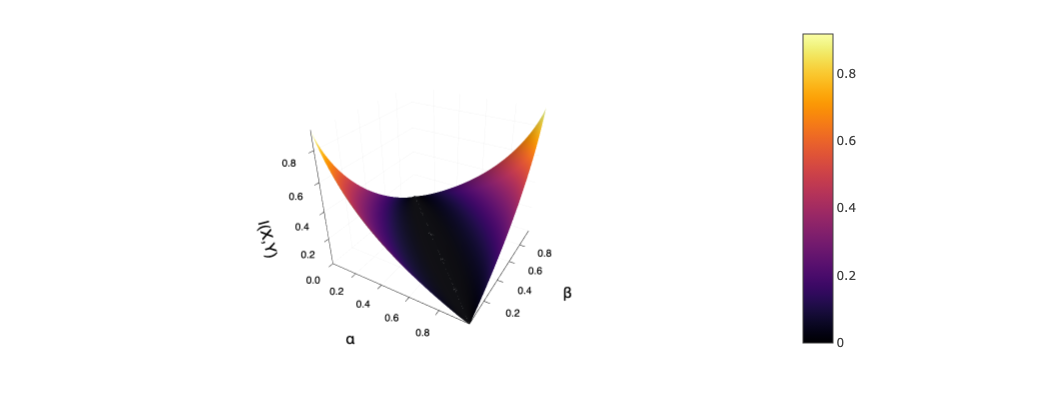

In [23]:
surface(αs,βs,Is)
xlabel!("α")
ylabel!("β")
zlabel!("I(X,Y)")